Importing the Essential Libraries, Metrics

In [55]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import metrics

Loading the Data

In [56]:
data = pd.read_csv('/content/data.csv')

Exploratory Data Analysis

In [57]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [58]:
data.shape

(4600, 18)

In [59]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [61]:
data = data.drop(['date','waterfront','view','condition','street','country','city'], axis = 1)

In [62]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,9410.000000,4820.000000,2014.000000,2014.000000


In [63]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,1340,0,1955,2005,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,3370,280,1921,0,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,1930,0,1966,0,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,1000,1000,1963,0,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,1140,800,1976,1992,WA 98052


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   sqft_above     4600 non-null   int64  
 7   sqft_basement  4600 non-null   int64  
 8   yr_built       4600 non-null   int64  
 9   yr_renovated   4600 non-null   int64  
 10  statezip       4600 non-null   object 
dtypes: float64(4), int64(6), object(1)
memory usage: 395.4+ KB


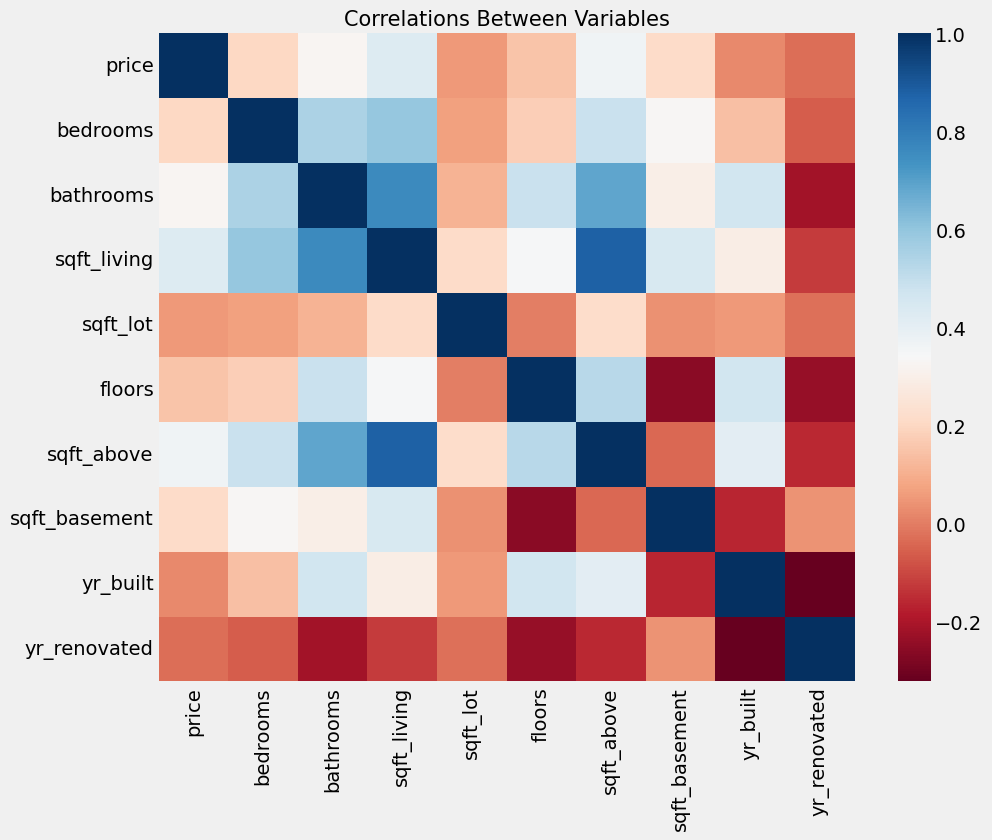

In [65]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), cmap = "RdBu")
plt.title("Correlations Between Variables", size = 15)
plt.show()

In [66]:
data['statezip'].value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

In [67]:
data['statezip'] = data['statezip'].apply(lambda x: x[2:])

In [68]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,1340,0,1955,2005,98133
1,2384000.0,5.0,2.50,3650,9050,2.0,3370,280,1921,0,98119
2,342000.0,3.0,2.00,1930,11947,1.0,1930,0,1966,0,98042
3,420000.0,3.0,2.25,2000,8030,1.0,1000,1000,1963,0,98008
4,550000.0,4.0,2.50,1940,10500,1.0,1140,800,1976,1992,98052


 Outlier detection

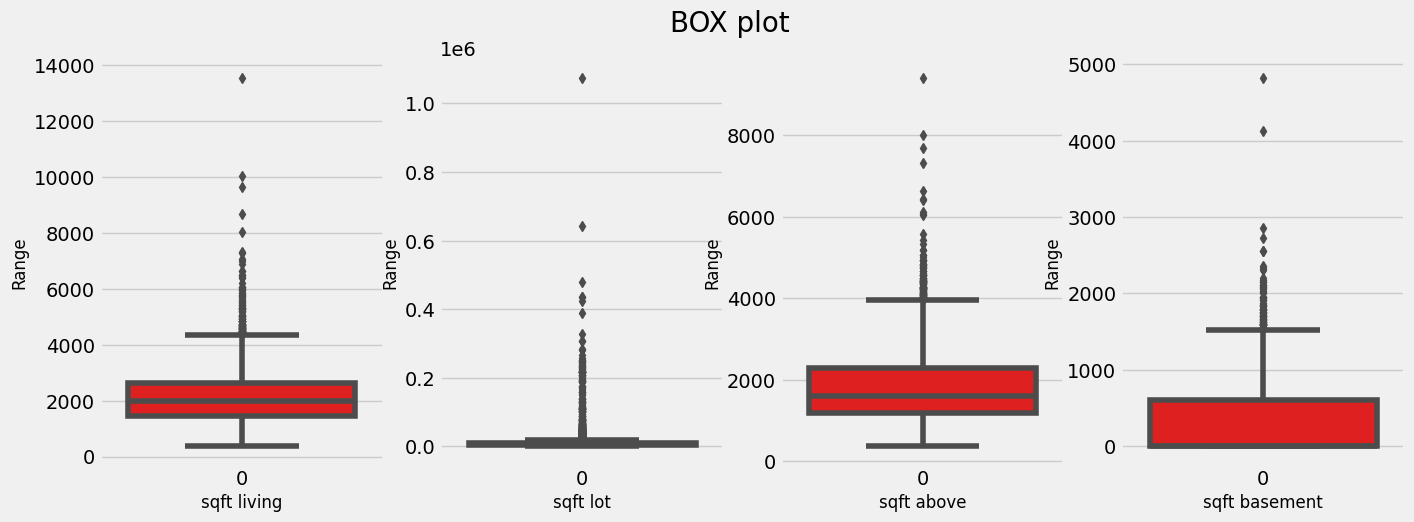

In [69]:
plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('fivethirtyeight')


plt.subplot(1,4,1)
sns.boxplot(data['sqft_living'], color = 'red')
plt.xlabel('sqft living', fontsize = 12 )
plt.ylabel('Range', fontsize = 12)


plt.subplot(1,4,2)
sns.boxplot(data['sqft_lot'], color = 'red')
plt.xlabel('sqft lot', fontsize = 12 )
plt.ylabel('Range', fontsize = 12)


plt.subplot(1,4,3)
sns.boxplot(data['sqft_above'], color = 'red')
plt.xlabel('sqft above', fontsize = 12 )
plt.ylabel('Range', fontsize = 12)



plt.subplot(1,4,4)
sns.boxplot(data['sqft_basement'], color = 'red')
plt.xlabel('sqft basement', fontsize = 12 )
plt.ylabel('Range', fontsize = 12)


plt.suptitle('BOX plot', fontsize = 20)
plt.show()

In [70]:
data = data[data['sqft_living'] > 0.6]
data = data[data['sqft_lot'] > 0.4]
data = data[data['sqft_above'] > 0.8]
data = data[data['sqft_basement'] > 0.6]

categorical data visualization

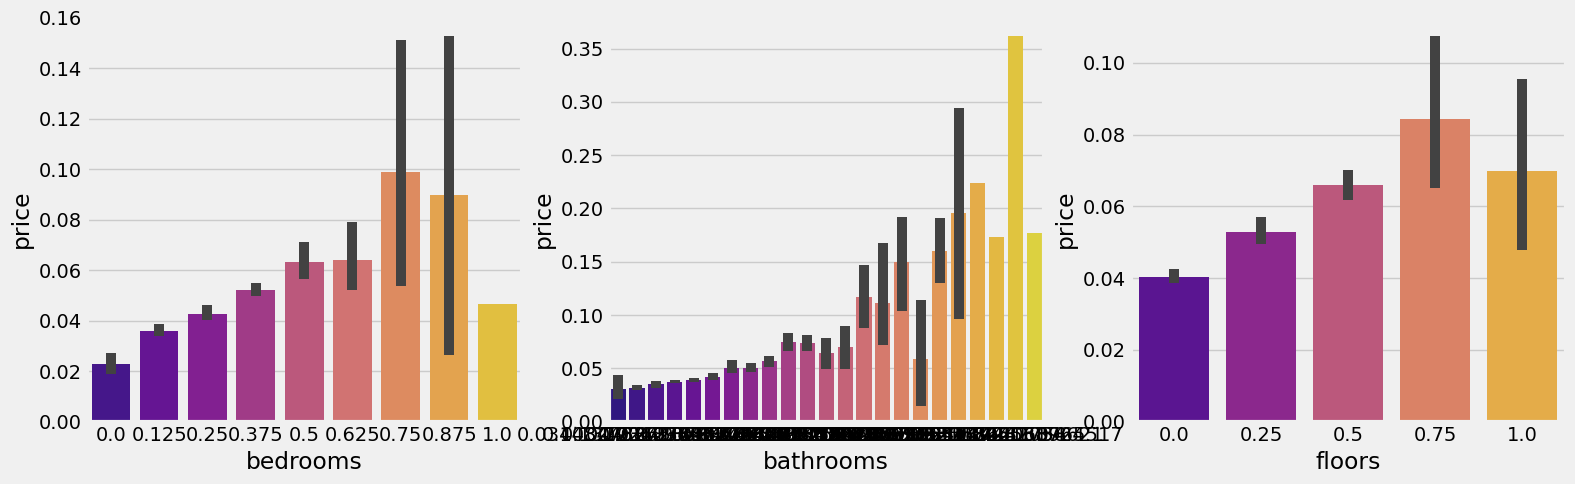

In [88]:
plt.rcParams['figure.figsize'] = (17,5)

plt.subplot(1,3,1)
sns.barplot(x ='bedrooms', y ='price', data = data, palette ='plasma')

plt.subplot(1,3,2)
sns.barplot(x ='bathrooms', y ='price', data = data, palette ='plasma')

plt.subplot(1,3,3)
sns.barplot(x ='floors', y ='price', data = data, palette ='plasma')

plt.show()

In [71]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()
data.iloc[:, :] = Scaler.fit_transform(data)

In [72]:
x = data.drop(['price'], axis =1)
y = data['price']

Training and Testing Machine Learning Models

In [73]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 4)

Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

model1 = LinearRegression()
model1.fit(xtrain, ytrain)


train_predictions1 = model1.predict(xtrain)
test_predictions1 = model1.predict(xtest)

In [75]:
MSE_train1 =  mean_squared_error(ytrain, train_predictions1)
MSE_test1 = mean_squared_error(ytest, test_predictions1)
print(f'MSE on training dataset : {MSE_train1}')
print(f'MSE on testing dataset : {MSE_test1}')

MSE on training dataset : 0.0005432438375481075
MSE on testing dataset : 0.0030038903077361802


In [93]:
scores = cross_val_score(model1, xtrain, ytrain, scoring='r2', cv=5)
scores

array([0.55777847, 0.4798513 , 0.40047189, 0.47453656, 0.4005984 ])

Random Forest Regressor

In [76]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()
model2.fit(xtrain,ytrain)


train_predictions2 = model1.predict(xtrain)
test_predictions2 = model1.predict(xtest)

In [77]:
MSE_train2 =  mean_squared_error(ytrain, train_predictions2)
MSE_test2 = mean_squared_error(ytest, test_predictions2)
print(f'MSE on training dataset : {MSE_train2}')
print(f'MSE on testing dataset : {MSE_test2}')

MSE on training dataset : 0.0005432438375481075
MSE on testing dataset : 0.0030038903077361802


In [95]:
scores = cross_val_score(model2, xtrain, ytrain, scoring='r2', cv=5)
scores

array([0.5913772 , 0.40938467, 0.40010298, 0.53561879, 0.46825793])

Gradient Boosting Regressor

In [79]:
from sklearn.ensemble import GradientBoostingRegressor

model3 = GradientBoostingRegressor()
model3.fit(xtrain, ytrain)

train_predictions3 = model2.predict(xtrain)
test_predictions3 = model2.predict(xtest)

In [80]:
MSE_train3 =  mean_squared_error(ytrain, train_predictions3)
MSE_test3 = mean_squared_error(ytest, test_predictions3)
print(f'MSE on training dataset : {MSE_train3}')
print(f'MSE on testing dataset : {MSE_test3}')

MSE on training dataset : 7.750943489656613e-05
MSE on testing dataset : 0.0028704515629107913


In [94]:
scores = cross_val_score(model3, xtrain, ytrain, scoring='r2', cv=5)
scores

array([0.65191919, 0.40925753, 0.44736201, 0.60694618, 0.50384251])